# Indirect Methods for Solving Systems of Linear Equations

#### Learning Outcomes
On successful completion of this page readers will be able to:

- Understand the concept of an indirect method when used to solve a system of linear equations.
- Apply the Jacobi, Gauss-Seidel and SOR methods to solve a linear system.
- Use the residual to determine the accuracy of the current estimate of the solution to the linear system.
- Determine whether an indirect method is convergent for a particular linear system and analyse the theoretical rate of convergence for indirect methods.

## Indirect methods

Indirect methods for solving systems of linear equations use an iterative approach to repeatedly update estimates of the exact solution to the linear system. They are called indirect methods since multiple applications of the method is required to calculate a solution unlike direct methods such as [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) and [LU decomposition](https://en.wikipedia.org/wiki/LU_decomposition) which require a single application to calculate the solution. However, direct methods are inefficient for large systems of equations for which we tend to using indirect methods instead. 

An indirect method for solving a system of linear equations of the form $A\mathbf{x}=\mathbf{b}$ is

$$\mathbf{x}^{k+1} = T \mathbf{x}^k + \mathbf{c},$$

where $\mathbf{x}^k$ is the current estimate of $\mathbf{x}$, $\mathbf{x}^{k+1}$ is the improved estimate of $\mathbf{x}$, $T$ is an **iteration matrix** and $\mathbf{c}$ is some vector. This equation is iterated updating the values of the estimates such that $\mathbf{x}^{(k)}$ as $k\to \infty$. Note that unlike direct methods which will calculate the exact solution, indirect only calculate an estimate (albeit very close) of the exact solution. 

## The Jacobi method

The [Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method) is the simplest indirect method. Splitting the coefficient matrix $A$ into the of elements from the lower triangular, diagonal and upper triangular parts of $A$ to form matrices $L$, $D$ and $U$ such that $A = D + L + U$, e.g., 

$$
    L = \pmatrix{ 0 & 0 & \cdots & 0 \cr a_{21} & 0 & \ddots & \vdots \cr \vdots & \ddots & \ddots & 0 \cr a_{n1} & \cdots & a_{n,n-1} & 0}, \qquad
    D = \pmatrix{ a_{11} & 0 & \cdots & 0 \cr 0 & a_{22} & \ddots & \vdots \cr \vdots &\ddots & \ddots & 0 \cr 0 & \cdots & 0 & a_{nn}}, \qquad
    U = \pmatrix{ 0 & a_{12} & \cdots & a_{1n} \cr 0 & 0 & \ddots & \vdots \cr \vdots &\ddots & \ddots & a_{n-1,n} & \cr 0 & \cdots & 0 & 0}.  
$$

Rewriting the linear system $A\mathbf{x}=\mathbf{b}$ using $D$, $L$ and $U$ gives

$$
(D + L + U) \mathbf{x} = \mathbf{b}
$$

which can be rearranged to

```{math}
:label: jacobi_x
\mathbf{x} = D^{-1}(\mathbf{b} - (L+U)\mathbf{x}).
```

Let the $\mathbf{x}$ on the left-hand side be $\mathbf{x}^{(k+1)}$ and the $\mathbf{x}$ on the right-hand side be $\mathbf{x}^{(k)}$ then writing this out for each element we have

```{math}
:label: jacobi
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1,j\neq i}^N a_{ij} x_j^{(k)}\right), \qquad i = 1,2, \ldots, n. 
```

### The residual

The Jacobi method is applied by iterating equation (2) until the solution $\mathbf{x}^{(k+1)}$ is accurate enough for our needs. Since we do not know what the exact solution is we can quantity the accuracy of an estimate by using the **residual** which is defined as

```{math}
:label: residual
\mathbf{r} = \mathbf{b} - A \mathbf{x}^{(k)},
```

so that as $\mathbf{x}^{(k)} \to \mathbf{x}$, $\mathbf{r} \to \mathbf{0}$. The convergence criteria used is

$$\|\mathbf{r}\| < tol,$$

where $tol$ is some small number. The smaller $tol$ is, the closer $\mathbf{x}^{(k)}$ is to the exact solution but this will require more iterations. In practice a compromise is made between the accuracy required and the computational resources available. Typical values of $tol$ are around $10^{-4}$ or maybe even $10^{-6}$.

#### Example 1

Calculate the first iteration of the Jacobi method to solve the following system of linear equations and calculate the norm of the residual. 

$$ \begin{aligned}
    4x_1 + 3x_2 &= -2, \\
    3x_1 + 4x_2 - x_3 &= -8, \\
    -x_2 + 4x_3 &= 14.
\end{aligned} $$

Using equation {eq}`jacobi` the Jacobi iterations are

$$ \begin{aligned}
    x_1^{(k+1)} &= \frac{1}{4}(-2 - 3x_2^{(k)}), \\
    x_2^{(k+1)} &= \frac{1}{4}(-8 - 3x_1^{(k)} + x_3^{(k)}), \\
    x_3^{(k+1)} &= \frac{1}{4}(14 + x_2^{(k)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0)^T$ the first iteration is

$$ \begin{aligned}
    x_1^{(1)} &= \frac{1}{4}(-2 - 3(0)) = -0.5, \\
    x_2^{(1)} &= \frac{1}{4}(-8 - 3(0) + 0) = -2, \\
    x_3^{(1)} &= \frac{1}{4}(14 + 0) = 3.5.
\end{aligned} $$

Calculate the residual using equation {eq}`residual`

$$\mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} 
= \pmatrix{-2 \cr -8 \cr 14}  - 
\pmatrix{4 & 3 & 0 \cr 3 & 4 & -1 \cr 0 & -1 & 4} 
\pmatrix{-0.5 \cr -2 \cr 3} = 
\pmatrix{ 6 \cr 5 \cr -2 },$$

and the norm of the residual is $\|\mathbf{r}^{(1)}\|=\sqrt{6^2 + 5^2 + (-2)^2} = 8.06226$.

#### Example 2

Write a MATLAB program to solve the system of linear equations from example 1 using the Jacobi method ceasing iterations when $\|\mathbf{r}\| < 10^{-4}$.

The function called `jacobi` below solves a linear system of equations defined by the arrays `A` and `b`. Iterations cease when $\|\mathbf{r}\|<tol$ or `maxiter` is exceeded.

In [1]:
import numpy as np

def jacobi(A, b, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using
    the Jacobi method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iteration loop
    for k in range(maxiter):
        
        # Calculate Jacobi method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if i != j:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k,j]
                    
            # Calculate new estimate of x_i
            x[k+1,i] = (b[i] - x[k+1,i]) / A[i,i]
            
        # Calculate the norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))
        
        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2, :]

The program below uses the function jacobi to solve the system of linear equations from example 1.

In [2]:
def solution_table(x, A, b):
    '''
    Prints a formatted table displaying the iterations values of an
    indirect method
    '''
    N = len(b)
    print('  k', end='')
    for i in range(N):
        print('      x_{} '.format(i), end='')
    print('    ||r||\n{}'.format('-' * (4 + (N + 1) * 10)))
    for k in range(x.shape[0]):
        print('{:4d}'.format(k), end='')
        for i in range(N):
            print('{:10.5f}'.format(x[k,i]), end='')
        print('{:10.5f}'.format(np.linalg.norm(b - np.matmul(A, x[k,:]))))


# Define linear system
A = np.array([[ 4, 3, 0 ],
              [ 3, 4, -1 ],
              [ 0, -1, 4 ]])
b = np.array([ -2, -8, 14 ])

# Solve linear system using the Jacobi method
x = jacobi(A, b, 100, 1e-4)

# Output solution table
solution_table(x, A, b)

  k      x_0       x_1       x_2     ||r||
--------------------------------------------
   0   0.00000   0.00000   0.00000  16.24808
   1  -0.50000  -2.00000   3.50000   8.06226
   2   1.00000  -0.75000   3.00000   6.37377
   3   0.06250  -2.00000   3.31250   5.03891
   4   1.00000  -1.21875   3.00000   3.98361
   5   0.41406  -2.00000   3.19531   3.14932
   6   1.00000  -1.51172   3.00000   2.48976
   7   0.63379  -2.00000   3.12207   1.96832
   8   1.00000  -1.69482   3.00000   1.55610
   9   0.77112  -2.00000   3.07629   1.23020
  10   1.00000  -1.80927   3.00000   0.97256
  11   0.85695  -2.00000   3.04768   0.76888
  12   1.00000  -1.88079   3.00000   0.60785
  13   0.91059  -2.00000   3.02980   0.48055
  14   1.00000  -1.92549   3.00000   0.37991
  15   0.94412  -2.00000   3.01863   0.30034
  16   1.00000  -1.95343   3.00000   0.23744
  17   0.96508  -2.00000   3.01164   0.18771
  18   1.00000  -1.97090   3.00000   0.14840
  19   0.97817  -2.00000   3.00728   0.11732
  20   1.000

So the Jacobi method took 50 iterations to converge to the solution $x_1=1.0000$, $x_2 = -2.0000$ and $x_3 = 3.0000$ correct to 4 decimal places.

---
## The Gauss-Seidel method

The speed of convergence for the Jacobi method can be improved by using the values of $x_j^{(k+1)}$ where $j<i$ to calculate $x_i^{(k+1)}$. This leads to the [Gauss-Seidel method](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method). Writing the coefficient matrix of a system of linear equations $A\mathbf{x}=\mathbf{b}$ as $A = L + D + U$

$$
\begin{aligned}
(L + D + U)\mathbf{x} &= \mathbf{b} \\
D\mathbf{x} &= \mathbf{b} - L\mathbf{x} - U\mathbf{x} \\
\mathbf{x} &= D^{-1}(\mathbf{b} - L\mathbf{x} - U\mathbf{x}).
\end{aligned}
$$

Since $L$ is a lower triangular matrix the values of $x_i^{(k+1)}$ can be calculated sequentially using forward substitution so the iterative form of the Gauss-Seidel method is

```{math}
:label: gauss-seidel
x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)}\right), \qquad  i = 1, 2, \ldots, n.
```

#### Example 3

Calculate the first iteration of the Gauss-Seidel method and the norm of the residual for the system of linear equations from example 1

$$ \begin{aligned}
4x_1 + 3x_2 &= -2, \\
3x_1 + 4x_2 - x_3 &= -8, \\
-x_2 + 4x_3 &= 14.
\end{aligned} $$

Using equation [(4)](#gauss-seidel) and the Gauss-Seidel iterations are

$$ \begin{aligned}
x_1^{(k+1)} &= \frac{1}{4}(-2 - 3x_2^{(k)}),\\
x_2^{(k+1)} &= \frac{1}{4}(-8 - 3x_1^{(k+1)} + x_3^{(k)}), \\
x_3^{(k+1)} &= \frac{1}{4}(14 + x_2^{(k+1)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0)^T$ the first iteration is

$$ \begin{aligned}
x_1^{(1)} &= \frac{1}{4}(-2-3(0)) = -0.5, \\
x_2^{(1)} &= \frac{1}{4}(-8 - 3(-0.5) + 0) = -1.625 \\
x_3^{(1)} &= \frac{1}{4}(14 - 1.625) = 3.09375. 
\end{aligned} $$

Calculate the residual using equation {eq}`residual`

$$\mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
\pmatrix{ -2 \cr -8 \cr 14} - \pmatrix{4 & 3 & 0 \cr 3 & 4 & -1 \cr 0 & -1 & 4}\pmatrix{-0.5 \cr -1.625 \cr 3.09375} = \pmatrix{4.875 \cr 3.09375 \cr 0},$$

and the norm of the residual is $\|\mathbf{r}^{(1)}\|=\sqrt{4.875^2 + 3.09375^2 + 0^2} = 5.77381$.

#### Example 4

Write a Python program to solve the system of linear equations from example 1 using the Gauss-Seidel method.

The function called `gauss_seidel` defined below solves a linear system of equations defined by the arrays `A` and `b`. Iterations cease when $\|\mathbf{r}\|<tol$ or `maxiter` is exceeded.

In [3]:
def gauss_seidel(A, b, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using
    the Gauss-Seidel method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iterationa loop
    for k in range(maxiter):
        
        # Calculate Gauss-Seidel method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if j < i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k+1,j]
                elif j > i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k, j]
            
            # Calculate new estimate of x_i
            x[k+1,i] = (b[i] - x[k+1,i]) / A[i,i]
        
        # Calculate norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))
        
        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2,:]

The program below uses the function `gauss_seidel` to solve the system of linear equations from example 1.

In [4]:
# Define linear system
A = np.array([[ 4, 3, 0 ],
              [ 3, 4, -1 ],
              [ 0, -1, 4 ]])
b = np.array([ -2, -8, 14 ])

# Solve linear system using the Gauss-Seidel method
x = gauss_seidel(A, b, 100, 1e-4)

# Output solution table
solution_table(x, A, b)

  k      x_0       x_1       x_2     ||r||
--------------------------------------------
   0   0.00000   0.00000   0.00000  16.24808
   1  -0.50000  -1.62500   3.09375   5.77381
   2   0.71875  -1.76562   3.05859   0.42334
   3   0.82422  -1.85352   3.03662   0.26459
   4   0.89014  -1.90845   3.02289   0.16537
   5   0.93134  -1.94278   3.01431   0.10335
   6   0.95708  -1.96424   3.00894   0.06460
   7   0.97318  -1.97765   3.00559   0.04037
   8   0.98324  -1.98603   3.00349   0.02523
   9   0.98952  -1.99127   3.00218   0.01577
  10   0.99345  -1.99454   3.00136   0.00986
  11   0.99591  -1.99659   3.00085   0.00616
  12   0.99744  -1.99787   3.00053   0.00385
  13   0.99840  -1.99867   3.00033   0.00241
  14   0.99900  -1.99917   3.00021   0.00150
  15   0.99938  -1.99948   3.00013   0.00094
  16   0.99961  -1.99967   3.00008   0.00059
  17   0.99976  -1.99980   3.00005   0.00037
  18   0.99985  -1.99987   3.00003   0.00023
  19   0.99990  -1.99992   3.00002   0.00014
  20   0.999

Note that the Gauss-Seidel method took 20 iterations to achieve convergence to $tol=10^{-4}$ whereas the Jacobi method took 50 iterations to achieve the same accuracy. 

---
## Convergence of direct methods

We have seen that both the Jacobi and Gauss-Seidel method converge to the solution to the example system of linear equations and that the Gauss-Seidel method converges at a faster rate. Direct methods will not be convergent for all linear systems and we tell if a method will be convergent using the theorem below

We can examine the convergence of an indirect method by considering the iteration of the error vector $\mathbf{e}^{(k)}$

if $\mathbf{v}_i$ are the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of the iteration matrix $T$ with corresponding [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) $\lambda_i$ then for the first error we can write

$$\mathbf{e}^{(0)} = \alpha_1 \mathbf{v}_1 + \alpha_2 \mathbf{v}_2 + \cdots + \alpha_n \mathbf{v}_n = \sum_{i=1}^n \alpha_i \mathbf{v}_i.$$

where $\alpha_i$ are scalars. Applying an iteration matrix to $\mathbf{e}^{(k)}$

$$ \begin{aligned}
\mathbf{e}^{(1)} &= T \mathbf{e}^{(0)} = T\left( \sum_{i=1}^n \alpha_i \mathbf{v}_i\right) = \sum_{i=1}^n \alpha_i T \mathbf{v}_i = \sum_{i=1}^n \alpha_i \lambda_i \mathbf{v}_i, \\
\mathbf{e}^{(2)} &= T \mathbf{e}^{(1)} =  T\left( \sum_{i=1}^n \alpha_i \lambda_i \mathbf{v}_i\right) = \sum_{i=1}^n \alpha_i \lambda_i T \mathbf{v}_i = \sum_{i=1}^n \alpha_i \lambda_i^2 \mathbf{v}_i, \\
&\vdots \\
\mathbf{e}^{(k+1)} &= \sum_{i=1}^n \alpha_i \lambda_i^k \mathbf{v}_i.
\end{aligned} $$

If $\|\lambda_1\|>\lambda_i$ for $i=2,3, \ldots, n$ then

$$\mathbf{e}^{(k+1)} = \alpha_1 \lambda_1^{k+1} \mathbf{v}_1 + \sum_{i=2}^n \alpha_i \lambda_i^{k+1} \mathbf{v}_i = \lambda_1^{k+1} \left( \alpha_1\mathbf{v}_1 + \sum_{i=2}^n \alpha_i\mathbf{v}_i \left(\frac{\lambda_i}{\lambda_1}\right)^{(k+1)}\right),$$

and since $\left(\dfrac{\lambda_i}{\lambda_1}\right)^{(k+1)}$ so

$$\lim_{k\to \infty} \mathbf{e}^{(k+1)} = \alpha_1 \lambda_1^{(k+1)} \mathbf{v}_1.$$

This means that the error varies by a factor of $\lambda_1^{(k+1)}$ where $\lambda_1$ is the largest eigenvalue of $T$ which is also known as the [spectral radius](https://en.wikipedia.org/wiki/Spectral_radius) and denoted by $\rho(T)$. The spectral radius gives us the following information about an indirect method

- If $\rho(T) > 1$ then the errors will increase over each iteration, therefore for an indirect method to converge to the solution we require $\rho(T)<1$. 
- The smaller the value of $\rho(T)$ the faster the errors will tend to zero. 

#### Example 5

Show that the Jacobi and Gauss-Seidel methods are convergent of the system of linear equations from example 1.

Recall that the matrix form of the Jacobi method is equation {eq}`jacobi_x`

$$\mathbf{x}^{(k+1)} = D^{-1}(\mathbf{b} - (L + U)\mathbf{x}^{(k)}) = -D^{-1}(L+U)\mathbf{x}^{(k)} + D^{-1}\mathbf{b},$$

so the iteration matrix for the Jacobi method is

```{math}
:label: T_J
T_J = -D^{-1}(L+U).
```

The iteration matrix for the Gauss-Seidel method can be found by rearranging $(L+D+U)\mathbf{x} = \mathbf{b}$

$$ \begin{aligned}
(L + D + U) \mathbf{x} &= \mathbf{b} \\
(L + D)\mathbf{x} &= \mathbf{b} - U \mathbf{x} \\
\mathbf{x} &= -(L+D)^{-1}U\mathbf{x}  + (L+D)^{-1}\mathbf{x},
\end{aligned} $$

So the Gauss-Seidel method is

$$\mathbf{x}^{(k+1)} = -(L+D)^{-1} U \mathbf{x}^{(k)} + (L+D)^{-1} \mathbf{x}^{(k+1)},$$

and the iteration matrix for the Gauss-Seidel method is

```{math}
:label: T_GS
T_{GS} = -(L+D)^{-1} U.
```

The code below calculates the spectral radius of $T_J$ and $T_{GS}$ .

In [5]:
def jacobi_iteration_matrix(L, D, U):
    return np.matmul(np.linalg.inv(D), L + U)

def gauss_seidel_iteration_matrix(L, D, U):
    return np.matmul(np.linalg.inv(L + D), U)

# Define coefficient matrix
A = np.array([[ 4, 3, 0 ],
              [ 3, 4, -1 ], 
              [ 0, -1, 4 ]])

# Calculate L, D and U
L = np.tril(A, -1)
U = np.triu(A, 1)
D = A - L - U

# Calculate spectral radii of TJ and TGS
val, vec = np.linalg.eig(jacobi_iteration_matrix(L, D, U))
rho_TJ = max(abs(val))
val, vec = np.linalg.eig(gauss_seidel_iteration_matrix(L, D, U))
rho_TGS = max(abs(val))

# Output results
print('rho(T_J) = {:0.4f}\nrho(T_GS) = {:0.4f}'.format(rho_TJ, rho_TGS))

rho(T_J) = 0.7906
rho(T_GS) = 0.6250


So $\rho(T_J)=0.7906$ and $\rho(T_{GS})=0.6250$ which are both less than 1 so both of these methods is convergent for this system. Furthermore, the Gauss-Seidel method will converge faster than the Jacobi method since it has a smaller spectral radius.

---
## The Successive Over Relaxation (SOR) method

The [Successive Over Relaxation (SOR) method](https://en.wikipedia.org/wiki/Successive_over-relaxation) improves on the convergence rate of the Gauss-Seidel method by applying a weighting factor to the updated estimates to increase (or decrease in the the case of oscillatory convergence) the affect of the change.

Let $\omega$ be a **relaxation parameter** in the range $[0,2]$ and $\mathbf{x}_{GS}^{(k)}$ denote the Gauss-Seidel solution for iteration $k$ then the SOR method is

$$\mathbf{x}^{(k+1)} = (1 - \omega)\mathbf{x}^{(k)} + \omega \mathbf{x}_{GS}^{(k)}$$

so the iterative scheme is 

$$
\begin{aligned}
\mathbf{x}^{(k+1)} &= (1 - \omega) \mathbf{x}^{(k)} + \frac{\omega}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij} \mathbf{x}_j^{(k+1)} - \sum_{j=i+1}^n a_{ij}\mathbf{x}_j^{(k)} \right). && (7)
\end{aligned}
$$

When $\omega<1$ the coefficient of the first term in equation (7) is multiplied by a number greater than 1 and the second term (which is the [Gauss-Seidel method](#gauss-seidel)) is multiplied by a number less than 1 therefore reducing the change in the value of the estimate from one iteration to the next. This will speed up the rate of convergence when the estimates oscillate about the exact solution.

When $\omega>1$ the coefficient of the first term is multiplied by a number less than 1 and the second term by a number greater than 1 therefore increasing the change in the estimates. This will speed up the rate of convergence when the estimates converge monotonically.

### Optimum value of the relaxation parameter

The optimum value of $\omega$ will be the one that minimises the spectral radius of the iteration matrix. The iteration matrix for the SOR method is derived by writing the coefficient matrix of the linear system $A\mathbf{x} = \mathbf{b}$ using

$$A = L + \left(1 - \frac{1}{\omega}\right)D + \frac{1}{\omega}D + U.$$

Substituting into the linear system and rearranging 

$$
\begin{aligned}
\left( L + \left( 1 - \frac{1}{\omega}\right)D + \frac{1}{\omega}D + U\right) \mathbf{x} &= \mathbf{b} \\
(D + \omega L) \mathbf{x} + ((\omega - 1) D + \omega U) \mathbf{x} &= \omega \mathbf{b} \\
(D + \omega L) \mathbf{x} &= ((1 - \omega)D - \omega U) \mathbf{x} +  \omega \mathbf{b} \\
\mathbf{x} &= (D + \omega L)^{-1}((1 - \omega)D-\omega U)\mathbf{x} + (D + \omega L)^{-1}\omega \mathbf{b}.
\end{aligned}
$$

So the matrix form of the SOR method is

$$\mathbf{x}^{(k+1)} = (D + \omega L)^{-1}((1 - \omega)D-\omega U)\mathbf{x}^{(k)} + (D + \omega L)^{-1}\omega \mathbf{b},$$

and the iteration matrix is

```{math}
:label: T_SOR
T_{SOR} = (D + \omega L)^{-1}((1 - \omega) D - \omega U).
```

Equation {eq}`T_SOR` is a function of $\omega$ so the spectral radius of $T_{SOR}$ will depend on $\omega$. 

#### Example 6

Determine the optimum relaxation parameter for the SOR when applied to the linear system from example 1.

The code below calculates the spectral radius of the SOR method for a range of $\omega$ values and plots them.

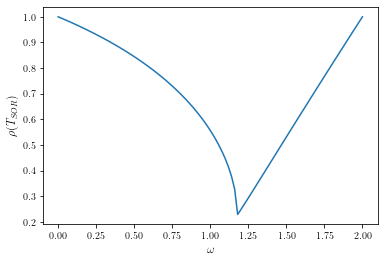

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

def sor_iteration_matrix(L, D, U, omega):
    return np.matmul(np.linalg.inv(D + omega * L), ((1 - omega) * D - omega * U))

# Define coefficient matrix
A = np.array([[ 4, 3, -1 ],
              [ 3, 4, -1 ], 
              [ -1, -1, 4 ]])

# Calculate L, D and U
L = np.tril(A, -1)
U = np.triu(A, 1)
D = A - L - U

# Calculate spectral radius for a range of omega values
omega = np.linspace(0, 2, 101)
rho_TSOR = np.zeros(omega.shape)
for i in range(len(omega)):
    val, vec = np.linalg.eig(sor_iteration_matrix(L, D, U, omega[i]))
    rho_TSOR[i] = max(abs(val));

# Plot spectral radius against omega
fig, ax = plt.subplots()

ax.plot(omega, rho_TSOR)

ax.set_xlabel('$\omega$', fontsize=12)
ax.set_ylabel('$\\rho(T_{SOR})$', fontsize=12)

plt.show()

The value of $\rho(T_{SOR})$ is a minimum when $\omega \approx 1.2$ so this is the optimum value.

```{admonition} **Theorem:** Optimum relaxation parameter
:class: tip
If a system of linear equations of the form $A\mathbf{x}=\mathbf{b}$ has a positive definite coefficient matrix $A$ with all real eigenvalues then the optimum relaxation parameter for the SOR method can be calculated using

$$\omega_{opt} = 1 + \left(\frac{\rho(T_J)}{1 + \sqrt{1 - \rho(T_J)^2}}\right)^2,$$

where $T_J$ is the iteration matrix for the Jacobi method (equation {eq}`T_J`).
```

#### Example 7

Determine the optimum value of the relaxation parameter $\omega$ for the linear system from example 1.

Checking that $A$ is positive definite

In [7]:
A = np.array([[ 4, 3, -1 ],
              [ 3, 4, -1 ],
              [ -1, -1, 4 ]])
val, vec = np.linalg.eig(A)
print('lambda_1 = {:0.4f}\nlambda_2 = {:0.4f}\nlambda_3 = {:0.4f}'\
      .format(val[0], val[1], val[2]))

lambda_1 = 7.5616
lambda_2 = 1.0000
lambda_3 = 3.4384


So $\lambda_1=7.5616$, $\lambda_2=1$ and $\lambda_3=3.4384$ which are all real and $A$ is symmetric so $A$ is a positive definite matrix.

We saw in example 6] that $\rho(T_J) = 0.7906$, so the optimum value of $\omega$ is

$$\omega_{opt} = 1 + \left(\frac{0.7906}{1 + \sqrt{1 - 0.7906^2}}\right)^2 = 1.2404.$$

#### Example 8

Calculate the first iteration of the SOR method using $\omega=1.24$ and the norm of the residual for the system of linear equations from example 1.

$$ \begin{aligned}
4x_1 + 3x_2 &= -2, \\
3x_1 + 4x_2 - x_3 &= -8, \\
-x_2 + 4x_3 &= 14.
\end{aligned} $$

The SOR iterations are

$$ \begin{aligned}
x_1^{(k+1)} &= (1 - 1.24)x_1^{(k)} +  \frac{1.24}{4}(-2 - 3x_2^{(k)}),\\
x_2^{(k+1)} &= (1 - 1.24)x_2^{(k)} + \frac{1.24}{4}(-8 - 3x_1^{(k+1)} + x_3^{(k)}), \\
x_3^{(k+1)} &= (1 - 1.24)x_3^{(k)} + \frac{1.24}{4}(14 + x_2^{(k+1)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0)^T$ the first iteration is

$$ \begin{aligned}
x_1^{(k+1)} &= (1 - 1.24)(0) +  \frac{1.24}{4}(-2 - 3(0)) = -0.62,\\
x_2^{(k+1)} &= (1 - 1.24)(0) + \frac{1.24}{4}(-8 - 3(-0.62) + 0) = -1.9034, \\
x_3^{(k+1)} &= (1 - 1.24)(0) + \frac{1.24}{4}(14 - 1.9034) = 3.74995.
\end{aligned} $$

Calculate the residual

$$\mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
\pmatrix{ -2 \cr -8 \cr 14} - 
\pmatrix{4 & 3 & 0 \cr 3 & 4 & -1 \cr 0 & -1 & 4}
\pmatrix{-0.62 \cr -1.9034 \cr 3.74995} = 
\pmatrix{6.1902 \cr 5.2235 \cr -2.9032},$$

and the norm of the residual is $\|\mathbf{r}^{(1)}\|=\sqrt{6.1902^2 + 5.2235^2 + (-2.9032)^2} = 8.60421$.

#### Example 9

Write a Python program to solve the system of linear equations from example 1 using the SOR method with $\omega=1.24$.

The function called `sor` below solves a linear system of equations defined by the arrays `A` and `b` using the SOR method. Iterations cease when $\|\mathbf{r}\|<tol$ or `maxiter` is exceeded.

In [8]:
def sor(A, b, omega, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using the SOR method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iteration loop
    for k in range(maxiter):
        
        # Calculate SOR method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if j < i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k+1,j]
                elif j > i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k,j]
            
            # Calculate new estimate of x_i
            x[k+1,i] = (1 - omega) * x[k,i] + omega * (b[i] - x[k+1,i]) / A[i,i]
        
        # Calculate the norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))

        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2,:]

The program below uses the function `sor` to solve the system of linear equations from example 1.

In [9]:
# Define linear system
A = np.array([[ 4, 3, 0 ],
              [ 3, 4, -1 ],
              [ 0, -1, 4 ]])
b = np.array([ -2, -8, 14 ])

# Solve linear system using the SOR method
x = sor(A, b, 1.24, 100, 1e-4)

# Output solution table
solution_table(x, A, b)

  k      x_0       x_1       x_2     ||r||
--------------------------------------------
   0   0.00000   0.00000   0.00000  16.24808
   1  -0.62000  -1.90340   3.74995   8.60421
   2   1.29896  -2.06874   2.79870   1.48306
   3   0.99217  -2.03863   3.03634   0.31850
   4   1.03780  -2.01462   2.98675   0.13283
   5   1.00452  -2.00481   3.00169   0.01419
   6   1.00338  -2.00147   2.99914   0.01066
   7   1.00055  -2.00043   3.00007   0.00118
   8   1.00027  -2.00012   2.99994   0.00080
   9   1.00005  -2.00003   3.00000   0.00011
  10   1.00002  -2.00001   3.00000   0.00006


Note that the SOR method took 10 iterations to achieve convergence to $tol=10^{-4}$ whereas the Gauss-Seidel and Jacobi methods took 20 and 50 iterations respectively to achieve the same accuracy.

---
## Summary

- Indirect methods use an iterative approach to improve an estimate of the solution to a system of linear equations. The methods are iterated until the estimates have achieved the required accuracy.
- The Jacobi method uses information from the previous iteration only to update the estimates.
- The Gauss-Seidel method uses values of estimates already calculated in a given iteration to update the estimates. This means that the Gauss-Seidel method will converge to a solution faster than the Jacobi method. 
- An indirect method will converge to the exact solution if the value of the spectral radius (the largest absolute eigenvalue) of the iteration matrix for a linear system is less than 1. 
- The smaller the value of the spectral radius, the faster the method will converge to the exact solution.
- The SOR method uses a relaxation parameter to adjust how much estimates will change over a single iteration. The value of the relaxation parameter is chosen to minimise the spectral radius. 

---
## Exercises

1. Using a pen and calculator, calculate the first 2 iterations of the Jacobi method for solving the system of linear equations below. Use starting values of $x_i^{(0)}=0$ and work to 4 decimal places.

    $$
\begin{aligned}
4x_1 + x_2 - x_3 + x_4 &= 14 ,\\
x_1 + 4x_2 - x_3 - x_4 &= 10, \\
-x_1 -x_2 + 5x_3 + x_4 &= -15, \\
x_1 - x_2 + x_3 + 3x_4 &= 3.
\end{aligned}
$$


2. Repeat question 1 using the Gauss-Seidel method.
3. Repeat question 1 using the SOR method using the optimum value for the relaxation parameter (use Python to determine the spectral radius of $T_J$).

4. Which method would you expect to converge to the solution with the fewest iterations? What quantitative evidence do you have to support your conclusion?

5. Write a Python program to calculate the solution to questions 1 to 3 using $tol=10^{-5}$.

6. A linear system has the following coefficient matrix. What is the largest value that  can be in order for the Jacobi method to be convergent?

    $$A = \pmatrix{ 2 & 1 \cr \alpha & 2}$$


7. A linear system has the following coefficient matrix. Is the Jacobi method convergent for this system? If not, can the system be altered so that the Jacobi method is convergent?

    $$A = \pmatrix{1 & 3 & 1 \cr 2 & 1 & 0 \cr 1 & 1 & 4}$$